In [1]:
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv('nuggets.csv')

In [3]:
data.head()

Season   Lg             Team   W   L   W/L%    Finish   SRS  Unnamed: 8  \
0  2025-26  NBA   Denver Nuggets   0   0    NaN       NaN   NaN         NaN   
1  2024-25  NBA  Denver Nuggets*  50  32  0.610  2nd of 5  3.97         NaN   
2  2023-24  NBA  Denver Nuggets*  57  25  0.695  2nd of 5  5.23         NaN   
3  2022-23  NBA  Denver Nuggets*  53  29  0.646  1st of 5  3.04         NaN   
4  2021-22  NBA  Denver Nuggets*  48  34  0.585  2nd of 5  2.16         NaN   

   Pace  Rel Pace   ORtg  Rel ORtg   DRtg  Rel DRtg  Unnamed: 15  \
0   NaN       NaN    NaN       NaN    NaN       NaN          NaN   
1  99.8       1.0  119.9       5.4  116.0       1.5          NaN   
2  96.8      -1.7  118.5       3.2  113.0      -2.3          NaN   
3  98.1      -1.0  117.6       2.8  114.2      -0.6          NaN   
4  97.8      -0.4  114.5       2.5  112.1       0.1          NaN   

                 Playoffs                             Coaches           Top WS  
0                     NaN                                 NaN              NaN  
1     Lost W. Conf. Semis  M. Malone (47-32) D. Adelman (3-0)  N. Jokić (16.4)  
2     Lost W. Conf. Semis                   M. Malone (57-25)  N. Jokić (17.0)  
3              Won Finals                   M. Malone (53-29)  N. Jokić (14.9)  
4  Lost W. Conf. 1st Rnd.                   M. Malone (48-34)  N. Jokić (15.2)

I wanted to get look at the data first to see what I am working with. Getting the first five datas to just get the feel of it. 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Season       59 non-null     object 
 1   Lg           59 non-null     object 
 2   Team         59 non-null     object 
 3   W            59 non-null     int64  
 4   L            59 non-null     int64  
 5   W/L%         58 non-null     float64
 6   Finish       58 non-null     object 
 7   SRS          58 non-null     float64
 8   Unnamed: 8   0 non-null      float64
 9   Pace         58 non-null     float64
 10  Rel Pace     58 non-null     float64
 11  ORtg         58 non-null     float64
 12  Rel ORtg     58 non-null     float64
 13  DRtg         58 non-null     float64
 14  Rel DRtg     58 non-null     float64
 15  Unnamed: 15  0 non-null      float64
 16  Playoffs     40 non-null     object 
 17  Coaches      58 non-null     object 
 18  Top WS       58 non-null     object 
dtypes: float64

In [5]:
data.dtypes

Season          object
Lg              object
Team            object
W                int64
L                int64
W/L%           float64
Finish          object
SRS            float64
Unnamed: 8     float64
Pace           float64
Rel Pace       float64
ORtg           float64
Rel ORtg       float64
DRtg           float64
Rel DRtg       float64
Unnamed: 15    float64
Playoffs        object
Coaches         object
Top WS          object
dtype: object

I wanted to also see what columns contain null values and also the data types that are in the dataset. 

In [6]:
data = data.drop(columns=['Unnamed: 8', 'Unnamed: 15'])

In [7]:
data.head(10)

Season   Lg             Team   W   L   W/L%    Finish   SRS  Pace  \
0  2025-26  NBA   Denver Nuggets   0   0    NaN       NaN   NaN   NaN   
1  2024-25  NBA  Denver Nuggets*  50  32  0.610  2nd of 5  3.97  99.8   
2  2023-24  NBA  Denver Nuggets*  57  25  0.695  2nd of 5  5.23  96.8   
3  2022-23  NBA  Denver Nuggets*  53  29  0.646  1st of 5  3.04  98.1   
4  2021-22  NBA  Denver Nuggets*  48  34  0.585  2nd of 5  2.16  97.8   
5  2020-21  NBA  Denver Nuggets*  47  25  0.653  2nd of 5  4.82  97.1   
6  2019-20  NBA  Denver Nuggets*  46  27  0.630  1st of 5  2.35  97.1   
7  2018-19  NBA  Denver Nuggets*  54  28  0.659  1st of 5  4.19  97.7   
8  2017-18  NBA   Denver Nuggets  46  36  0.561  5th of 5  1.57  96.8   
9  2016-17  NBA   Denver Nuggets  40  42  0.488  4th of 5  0.70  98.3   

   Rel Pace   ORtg  Rel ORtg   DRtg  Rel DRtg                Playoffs  \
0       NaN    NaN       NaN    NaN       NaN                     NaN   
1       1.0  119.9       5.4  116.0       1.5     Lost W. Conf. Semis   
2      -1.7  118.5       3.2  113.0      -2.3     Lost W. Conf. Semis   
3      -1.0  117.6       2.8  114.2      -0.6              Won Finals   
4      -0.4  114.5       2.5  112.1       0.1  Lost W. Conf. 1st Rnd.   
5      -2.1  117.1       4.8  112.1      -0.2     Lost W. Conf. Semis   
6      -3.2  113.1       2.5  111.0       0.4    Lost W. Conf. Finals   
7      -2.3  113.0       2.6  108.9      -1.5     Lost W. Conf. Semis   
8      -0.5  112.5       3.9  111.0       2.4                     NaN   
9       1.9  113.2       4.4  112.7       3.9                     NaN   

                              Coaches           Top WS  
0                                 NaN              NaN  
1  M. Malone (47-32) D. Adelman (3-0)  N. Jokić (16.4)  
2                   M. Malone (57-25)  N. Jokić (17.0)  
3                   M. Malone (53-29)  N. Jokić (14.9)  
4                   M. Malone (48-34)  N. Jokić (15.2)  
5                   M. Malone (47-25)  N. Jokić (15.6)  
6                   M. Malone (46-27)   N. Jokić (9.8)  
7                   M. Malone (54-28)  N. Jokić (11.8)  
8                   M. Malone (46-36)  N. Jokić (10.7)  
9                   M. Malone (40-42)   N. Jokić (9.7)

I had dropped the Unnamed: 8 and Unnamed: 15 columns because it seem to not have anything contributed to the data set or have any valueable insight. It also had no values at all in the columns. 

In [8]:
data.drop(['Lg', 'Team'], axis=1, inplace=True)

In [9]:
data = data[data['Season'] != '2025-26']

In [10]:
data.head()

Season   W   L   W/L%    Finish   SRS  Pace  Rel Pace   ORtg  Rel ORtg  \
1  2024-25  50  32  0.610  2nd of 5  3.97  99.8       1.0  119.9       5.4   
2  2023-24  57  25  0.695  2nd of 5  5.23  96.8      -1.7  118.5       3.2   
3  2022-23  53  29  0.646  1st of 5  3.04  98.1      -1.0  117.6       2.8   
4  2021-22  48  34  0.585  2nd of 5  2.16  97.8      -0.4  114.5       2.5   
5  2020-21  47  25  0.653  2nd of 5  4.82  97.1      -2.1  117.1       4.8   

    DRtg  Rel DRtg                Playoffs  \
1  116.0       1.5     Lost W. Conf. Semis   
2  113.0      -2.3     Lost W. Conf. Semis   
3  114.2      -0.6              Won Finals   
4  112.1       0.1  Lost W. Conf. 1st Rnd.   
5  112.1      -0.2     Lost W. Conf. Semis   

                              Coaches           Top WS  
1  M. Malone (47-32) D. Adelman (3-0)  N. Jokić (16.4)  
2                   M. Malone (57-25)  N. Jokić (17.0)  
3                   M. Malone (53-29)  N. Jokić (14.9)  
4                   M. Malone (48-34)  N. Jokić (15.2)  
5                   M. Malone (47-25)  N. Jokić (15.6)

I wanted to drop the columns that were redundant. It made no sense to keep columns that repeated the same values. I also wanted to take out the 2025 - 2026 season since the season had not started yet when I had this analysis. 

In [11]:
data = data.reset_index(drop=True)

In [12]:
data.head()

Season   W   L   W/L%    Finish   SRS  Pace  Rel Pace   ORtg  Rel ORtg  \
0  2024-25  50  32  0.610  2nd of 5  3.97  99.8       1.0  119.9       5.4   
1  2023-24  57  25  0.695  2nd of 5  5.23  96.8      -1.7  118.5       3.2   
2  2022-23  53  29  0.646  1st of 5  3.04  98.1      -1.0  117.6       2.8   
3  2021-22  48  34  0.585  2nd of 5  2.16  97.8      -0.4  114.5       2.5   
4  2020-21  47  25  0.653  2nd of 5  4.82  97.1      -2.1  117.1       4.8   

    DRtg  Rel DRtg                Playoffs  \
0  116.0       1.5     Lost W. Conf. Semis   
1  113.0      -2.3     Lost W. Conf. Semis   
2  114.2      -0.6              Won Finals   
3  112.1       0.1  Lost W. Conf. 1st Rnd.   
4  112.1      -0.2     Lost W. Conf. Semis   

                              Coaches           Top WS  
0  M. Malone (47-32) D. Adelman (3-0)  N. Jokić (16.4)  
1                   M. Malone (57-25)  N. Jokić (17.0)  
2                   M. Malone (53-29)  N. Jokić (14.9)  
3                   M. Malone (48-34)  N. Jokić (15.2)  
4                   M. Malone (47-25)  N. Jokić (15.6)

I wanted to reset the index to make the index consistent and in order. 

In [13]:
data.rename(columns = {'W': 'Wins', 'L': 'Loses', 'W/L%' : 'Win_percentage', 'Finish': 'Standings', 'SRS' : 'Simple_rating_system', 
                       'Rel Pace' : 'Relative_pace', 'ORtg': 'Offensive_rating', 'Rel ORtg': 'Relative_offensive_rating', 
                       'DRtg' : 'Defensive_rating', 'Rel DRtg' : 'Relative_defensive_rating', 'Playoffs' : 'Playoff_results', 'Coaches' : 'Coach_records',
                      'Top WS' : 'Top_win_share'}, inplace=True)

In [14]:
data.head()

Season  Wins  Loses  Win_percentage Standings  Simple_rating_system  Pace  \
0  2024-25    50     32           0.610  2nd of 5                  3.97  99.8   
1  2023-24    57     25           0.695  2nd of 5                  5.23  96.8   
2  2022-23    53     29           0.646  1st of 5                  3.04  98.1   
3  2021-22    48     34           0.585  2nd of 5                  2.16  97.8   
4  2020-21    47     25           0.653  2nd of 5                  4.82  97.1   

   Relative_pace  Offensive_rating  Relative_offensive_rating  \
0            1.0             119.9                        5.4   
1           -1.7             118.5                        3.2   
2           -1.0             117.6                        2.8   
3           -0.4             114.5                        2.5   
4           -2.1             117.1                        4.8   

   Defensive_rating  Relative_defensive_rating         Playoff_results  \
0             116.0                        1.5     Lost W. Conf. Semis   
1             113.0                       -2.3     Lost W. Conf. Semis   
2             114.2                       -0.6              Won Finals   
3             112.1                        0.1  Lost W. Conf. 1st Rnd.   
4             112.1                       -0.2     Lost W. Conf. Semis   

                        Coach_records    Top_win_share  
0  M. Malone (47-32) D. Adelman (3-0)  N. Jokić (16.4)  
1                   M. Malone (57-25)  N. Jokić (17.0)  
2                   M. Malone (53-29)  N. Jokić (14.9)  
3                   M. Malone (48-34)  N. Jokić (15.2)  
4                   M. Malone (47-25)  N. Jokić (15.6)

I renamed the columns just in case for the peole that do no understand the abbreviations and make it understandable for anyone to read it. 

In [15]:
data.drop(columns=['Coach_records', 'Top_win_share'],inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season                     58 non-null     object 
 1   Wins                       58 non-null     int64  
 2   Loses                      58 non-null     int64  
 3   Win_percentage             58 non-null     float64
 4   Standings                  58 non-null     object 
 5   Simple_rating_system       58 non-null     float64
 6   Pace                       58 non-null     float64
 7   Relative_pace              58 non-null     float64
 8   Offensive_rating           58 non-null     float64
 9   Relative_offensive_rating  58 non-null     float64
 10  Defensive_rating           58 non-null     float64
 11  Relative_defensive_rating  58 non-null     float64
 12  Playoff_results            40 non-null     object 
dtypes: float64(8), int64(2), object(3)
memory usage: 6.0

I took a closer look at the data and wanted to drop the coach records and top win share because I thought it did not have any valuble insight about the team in general. I also wanted to see what the null values were. 

In [17]:
playoff_check = data[['Standings', 'Playoff_results']]
playoff_check[playoff_check['Playoff_results'].isna()]

Standings Playoff_results
7   5th of 5             NaN
8   4th of 5             NaN
9   4th of 5             NaN
10  4th of 5             NaN
11  4th of 5             NaN
22  7th of 7             NaN
23  6th of 7             NaN
24  6th of 7             NaN
25  5th of 7             NaN
26  6th of 7             NaN
27  7th of 7             NaN
28  5th of 7             NaN
29  4th of 7             NaN
32  4th of 6             NaN
33  4th of 6             NaN
34  7th of 7             NaN
44  4th of 6             NaN
45  3rd of 5             NaN

To me looking at the data playoff results could have null values because the team did not make it to the payoff with the standing results. Instead of assuming that, I isolated the two coulmns to make sure that was the case. 

In [33]:
data['Playoff_results'] = data.Playoff_results.fillna('Did_not_qualify')
data

Season  Wins  Loses  Win_percentage Standings  Simple_rating_system  \
0   2024-25    50     32           0.610  2nd of 5                  3.97   
1   2023-24    57     25           0.695  2nd of 5                  5.23   
2   2022-23    53     29           0.646  1st of 5                  3.04   
3   2021-22    48     34           0.585  2nd of 5                  2.16   
4   2020-21    47     25           0.653  2nd of 5                  4.82   
5   2019-20    46     27           0.630  1st of 5                  2.35   
6   2018-19    54     28           0.659  1st of 5                  4.19   
7   2017-18    46     36           0.561  5th of 5                  1.57   
8   2016-17    40     42           0.488  4th of 5                  0.70   
9   2015-16    33     49           0.402  4th of 5                 -2.81   
10  2014-15    30     52           0.366  4th of 5                 -3.07   
11  2013-14    36     46           0.439  4th of 5                 -1.40   
12  2012-13    57     25           0.695  2nd of 5                  5.37   
13  2011-12    38     28           0.576  2nd of 5                  3.16   
14  2010-11    50     32           0.610  2nd of 5                  4.81   
15  2009-10    53     29           0.646  1st of 5                  4.15   
16  2008-09    54     28           0.659  1st of 5                  3.13   
17  2007-08    50     32           0.610  2nd of 5                  3.74   
18  2006-07    45     37           0.549  2nd of 5                  1.69   
19  2005-06    44     38           0.537  1st of 5                  0.36   
20  2004-05    49     33           0.598  2nd of 5                  2.23   
21  2003-04    43     39           0.524  6th of 7                  1.65   
22  2002-03    17     65           0.207  7th of 7                 -7.41   
23  2001-02    27     55           0.329  6th of 7                 -5.19   
24  2000-01    40     42           0.488  6th of 7                 -1.83   
25  1999-00    35     47           0.427  5th of 7                 -1.76   
26  1998-99    14     36           0.280  6th of 7                 -6.67   
27  1997-98    11     71           0.134  7th of 7                -11.74   
28  1996-97    21     61           0.256  5th of 7                 -6.40   
29  1995-96    35     47           0.427  4th of 7                 -2.62   
30  1994-95    41     41           0.500  4th of 6                  0.96   
31  1993-94    42     40           0.512  4th of 6                  1.54   
32  1992-93    36     46           0.439  4th of 6                 -2.14   
33  1991-92    24     58           0.293  4th of 6                 -7.59   
34  1990-91    20     62           0.244  7th of 7                -10.31   
35  1989-90    43     39           0.524  4th of 7                  1.56   
36  1988-89    44     38           0.537  3rd of 6                  0.91   
37  1987-88    54     28           0.659  1st of 6                  3.32   
38  1986-87    37     45           0.451  4th of 6                 -1.14   
39  1985-86    47     35           0.573  2nd of 6                  0.89   
40  1984-85    52     30           0.634  1st of 6                  2.05   
41  1983-84    38     44           0.463  3rd of 6                 -1.27   
42  1982-83    45     37           0.549  2nd of 6                  0.27   
43  1981-82    46     36           0.561  2nd of 6                  0.13   
44  1980-81    37     45           0.451  4th of 6                 -0.95   
45  1979-80    30     52           0.366  3rd of 5                 -4.22   
46  1978-79    47     35           0.573  2nd of 5                  1.24   
47  1977-78    48     34           0.585  1st of 6                  0.80   
48  1976-77    50     32           0.610  1st of 6                  4.95   
49  1975-76    60     24           0.714  1st of 0                  5.45   
50  1974-75    65     19           0.774  1st of 5                  6.63   
51  1973-74    37     47           0.440  5th of 5   

When I isolated the two columns I did see that the playoff results were null because the nuggets did not have a good standing results. I did not want to leave the rows empty because that would be bad on training the model. So I dilledd the empty rows with "Did_not_qualify". 

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Season                     58 non-null     object 
 1   Wins                       58 non-null     int64  
 2   Loses                      58 non-null     int64  
 3   Win_percentage             58 non-null     float64
 4   Standings                  58 non-null     object 
 5   Simple_rating_system       58 non-null     float64
 6   Pace                       58 non-null     float64
 7   Relative_pace              58 non-null     float64
 8   Offensive_rating           58 non-null     float64
 9   Relative_offensive_rating  58 non-null     float64
 10  Defensive_rating           58 non-null     float64
 11  Relative_defensive_rating  58 non-null     float64
 12  Playoff_results            58 non-null     object 
dtypes: float64(8), int64(2), object(3)
memory usage: 6.0

I took a look at the informatin again just to make sure I covered everything with the data types, null values, and columns easy to read. 

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
X = data[['Simple_rating_system', 'Pace', 'Relative_pace', 'Offensive_rating', 'Relative_offensive_rating', 'Defensive_rating', 
          'Relative_defensive_rating']]
y = data['Wins']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

In [40]:
print('R^2:', r2_score(y_test, y_pred))
print('Coeffficents:', model.coef_)
print('Intercepts:', model.intercept_)

R^2: 0.7998142761293435
Coeffficents: [ 1.97480234e+00  1.76215601e-01  1.86349173e-01  1.30636163e+12
 -1.30636163e+12 -1.30636163e+12  1.30636163e+12]
Intercepts: -27.599837593410328


I used Linear Regression to see if it can predicit if the nuggets win based on the features it had to contribute them winning. 

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

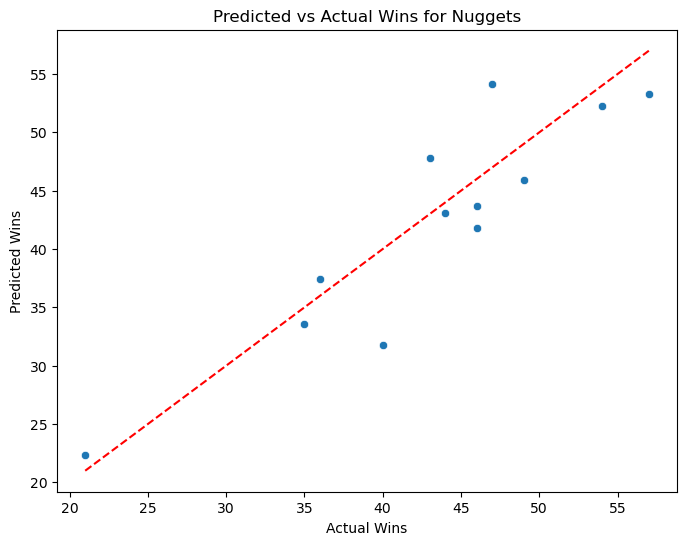

In [42]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel('Actual Wins')
plt.ylabel('Predicted Wins')
plt.title('Predicted vs Actual Wins for Nuggets')
plt.show()


In [43]:
playoff_win_percentage = data[['Win_percentage', 'Playoff_results']]
playoff_win_percentage[playoff_win_percentage['Playoff_results'] == 'Did_not_qualify']

Win_percentage  Playoff_results
7            0.561  Did_not_qualify
8            0.488  Did_not_qualify
9            0.402  Did_not_qualify
10           0.366  Did_not_qualify
11           0.439  Did_not_qualify
22           0.207  Did_not_qualify
23           0.329  Did_not_qualify
24           0.488  Did_not_qualify
25           0.427  Did_not_qualify
26           0.280  Did_not_qualify
27           0.134  Did_not_qualify
28           0.256  Did_not_qualify
29           0.427  Did_not_qualify
32           0.439  Did_not_qualify
33           0.293  Did_not_qualify
34           0.244  Did_not_qualify
44           0.451  Did_not_qualify
45           0.366  Did_not_qualify

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
data['Playoff_results'] = data['Playoff_results'].apply(lambda x: 0 if x == 'Did_not_qualify' else 1)

In [49]:
X = data[['Win_percentage']]
y = data['Playoff_results']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=4)

In [51]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [56]:
y_probs = log.predict_proba(X_test)[:,1]

y_pred = (y_probs >= 0.561).astype(int)

In [57]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred))

[[0 5]
 [0 7]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.58      1.00      0.74         7

    accuracy                           0.58        12
   macro avg       0.29      0.50      0.37        12
weighted avg       0.34      0.58      0.43        12



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


I used Logisitc Regression to see if can predict the paly off results based on win percentage. I had to change the  playoff results to 0 a